In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-k67140ey
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-k67140ey
  Stored in directory: /tmp/pip-ephem-wheel-cache-onfgc7ch/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import statsmodels.api as sm

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 5.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [0]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#gohawks.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [0]:
print(len(status_count))
print(len(retweet_count))
print(len(friends_count))
# print(len(mentions_count))


print((status_count[0:100]))
print(hashtag_count[0:100])
print(friends_count[0:100])
print(mentions_TF[0:100])
print(favourites_count[0:100])

print(url_ratio_count[0:100])
print(len(url_ratio_count))


169122
169122
169122
[12477, 156, 3897, 82505, 3747, 32669, 1758, 561, 715, 4835, 3938, 632, 84055, 4628, 49162, 5344, 1, 1341, 576, 427, 254, 7624, 1312, 7418, 7808, 1805, 41771, 579, 351, 4507, 307, 147583, 90, 41873, 7233, 4797, 735, 3615, 86565, 8827, 60647, 1435, 2220, 2099, 509, 4422, 989, 38311, 182, 587, 98, 735, 1722, 791, 588, 6809, 3938, 601, 6040, 4660, 8059, 1280, 134, 50748, 32225, 4591, 9498, 60685, 4592, 215, 11692, 3796, 6297, 4267, 331, 174, 106, 9508, 29451, 29471, 7, 31098, 26283, 4308, 3983, 3970, 1758, 14352, 1791, 14658, 21052, 4751, 2724, 14660, 527, 5820, 15996, 14706, 14665, 1760]
[1, 2, 3, 7, 1, 1, 3, 4, 1, 1, 3, 1, 6, 2, 3, 2, 1, 1, 3, 6, 1, 1, 9, 4, 4, 3, 6, 5, 4, 5, 3, 6, 3, 3, 1, 2, 2, 2, 4, 3, 1, 1, 4, 5, 4, 4, 1, 3, 4, 5, 4, 2, 2, 4, 5, 4, 3, 1, 1, 2, 4, 4, 1, 4, 1, 3, 2, 1, 3, 3, 2, 2, 7, 2, 1, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 4, 1, 1, 1, 2, 1, 8, 2, 1, 1, 1, 1, 3, 4]
[2025, 29, 1455, 17, 918, 858, 349, 201, 78, 1565, 796, 105, 17, 1163, 649, 2000, 40,

In [0]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  578.2188888888888
Average number of tweets per hour 292.48785062173687


In [0]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]
num_tweet=[]
for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    item_tweet=0
    for indexlayer in innerelement:
      
      item_tweet+=1
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)
    num_tweet.append(item_tweet)

n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))


# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

579
579
579
579
579


In [0]:
df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])

In [0]:
df.head()

,# of Tweets,# of retweets,Sum n followers,Max followers,Mentions,Status,Hashtags,Friends,Favourites,Time of day
0,29,459,23814.0,12922.0,15,452656,62,15595,81313,0
1,13,32,7774.0,2592.0,8,98039,39,9091,16274,1
2,14,378,26891.0,11886.0,5,220923,49,9419,61288,2
3,9,28,19094.0,11886.0,4,90995,23,11465,34526,3
4,24,62,31949.0,9772.0,17,243357,50,23468,32951,4


In [0]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# X_train, X_test, y_train, y_test = train_test_split(input_arr, output_arr, test_size=0.2, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


# fig = plt.figure(figsize=(16,11))
# fig = sm.graphics.plot_partregress_grid(results, fig=fig)
# fig.show()
# # plot fitted values vs true values
# plt.figure(figsize=(16,11))
# plt.scatter(y_test, output_predicted, color='red', edgecolors='b')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4)
# plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
# plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
# plt.title('Fitted Values vs True Values', fontsize = 16)
# plt.show()

PREDICTION [ 5.80284644e+01  2.36621300e+01  6.46972688e+01  3.21130193e+01
 -6.78004130e+00  1.16181884e+02  1.33065068e+02 -3.71237939e+00
  6.97419223e+01  6.89984245e+01  1.56017868e+02  2.25406987e+02
  2.80352406e+02  9.47322920e+00  7.22016695e+01  2.34471976e+02
  1.87757845e+02  6.43610943e+01  2.41490044e+02 -2.29638464e+02
  6.41956903e+01  3.23620304e+01 -1.77355838e+02 -2.32114263e+00
  2.19679335e+01  4.71815474e+01  3.20483045e+00 -1.49983361e+01
  6.38573240e+01  1.13091975e+01  1.88072428e+02 -3.59306769e+01
 -3.78618245e+01  1.75272023e+02  9.78828946e+01 -4.61681292e+02
 -1.95879276e+02 -4.78828470e+01  4.43347443e+02 -5.93616622e+00
  1.96476927e+02  1.37546283e+02  3.50183561e+02  9.13955175e+01
  9.76822101e+01  1.96020288e+02  9.74197739e+01  1.47844234e+01
  3.20061036e+02  2.17649293e+01  1.90326680e+00  2.50314151e-01
  6.20396824e+01  5.02047991e+01  7.07802626e+01  5.39422404e+02
  1.18827330e+02  6.09721267e+02  1.07168490e+03  8.33538630e+02
  5.92559217e+

In [0]:

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
#     '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
#     'Max followers': my_max_follower_count,
#     'Mentions': my_mentions_TF,
#     'Status': my_status_count,
#     'Hashtags': my_hashtag_count,
#     'Friends': my_friends_count,
    'Favourites': my_favourites_count,
#     'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
#                   '# of retweets', 
                  'Sum n followers', 
#                   'Max followers', 
#                   'Mentions',
#                   'Status', 
#                   'Hashtags', 
#                   'Friends', 
                  'Favourites',
#                   'Time of day'
                 ])


PREDICTION [ 1.20238222e+02  6.60940075e+01  1.28446292e+02  1.02244127e+02
  5.80424368e+01  2.06324136e+02  2.03926893e+02  2.17597345e+00
  9.74165115e+01  7.52360862e+01  9.41364112e+01  3.16868118e+02
  1.11277999e+02 -1.85664400e+02  1.10540332e+02  2.73394452e+02
  2.69905667e+02  1.91500236e+02  3.75016271e+02 -8.34236373e+01
  1.08095227e+02  9.58350845e+01  8.93392815e+01  1.12341176e+02
  6.10678745e+01  6.49247235e+01  5.58579942e+01  4.74828972e+01
  1.41984457e+02  8.19706234e+01  2.06750739e+02  5.22624104e+01
 -3.89711050e+01  1.23017886e+02  1.74024654e+02 -1.06438069e+02
 -5.32980613e+01 -6.28993200e+01  4.49989519e+02 -7.53836275e+01
  2.83394754e+02  6.46029162e+01  3.91226697e+02  1.62445724e+02
  1.62912522e+02  2.72053445e+02  2.40177035e+02  1.73119354e+02
  2.38314658e+02  8.68924457e+01  6.91786242e+01  6.93838404e+01
  1.07038217e+02  1.07484163e+02  4.33343771e+01  2.74604992e+02
 -2.11602304e+02  4.07909232e+02  8.87355385e+02  4.78141883e+02
  2.76043273e+

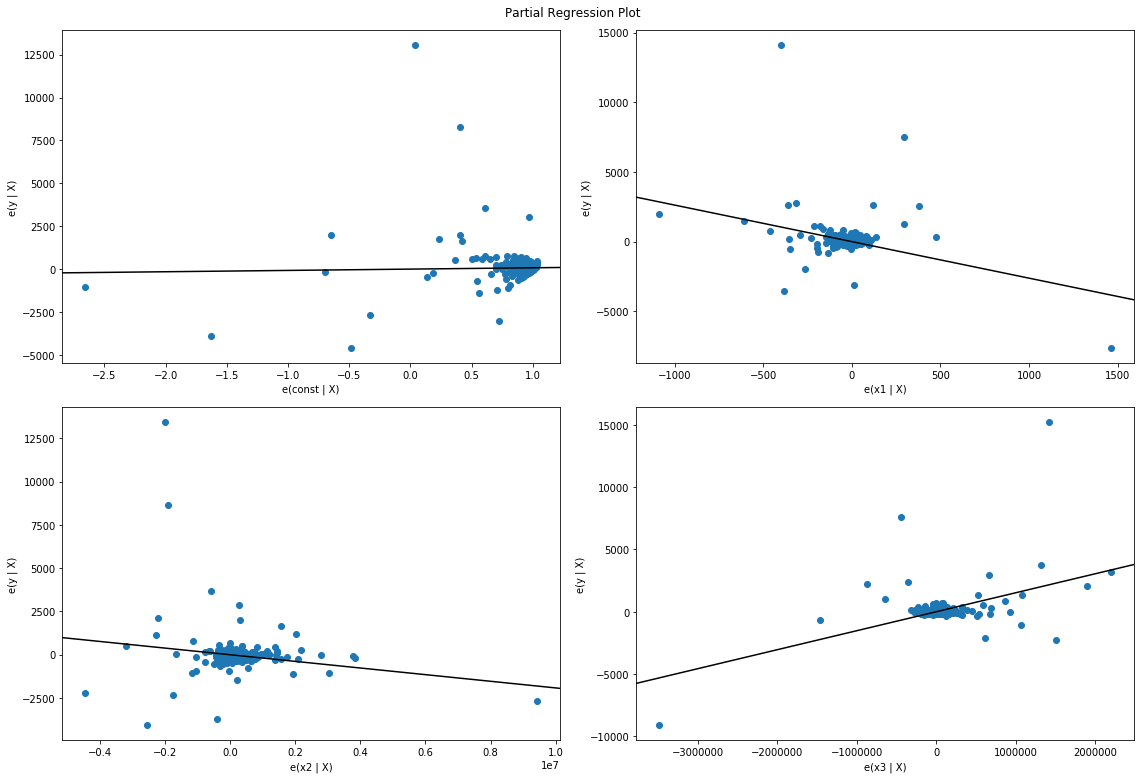

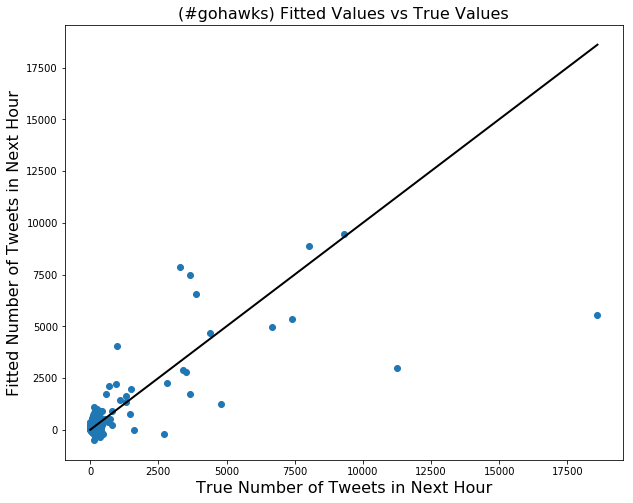

In [0]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# X_train, X_test, y_train, y_test = train_test_split(input_arr, output_arr, test_size=0.2, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(10,8))
plt.scatter(output_arr, output_predicted)
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=2, color='black')
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('(#gohawks) Fitted Values vs True Values', fontsize = 16)
plt.show()

In [0]:
df.head()

,# of Tweets,Sum n followers,Favourites
0,29,23814.0,81313
1,13,7774.0,16274
2,14,26891.0,61288
3,9,19094.0,34526
4,24,31949.0,32951
